# Linear Regression

### Part 1:
- Will use data that has no missing data or issues (artificial data) just to demonstrate basic understanding.

### Part 2: Project Exercises 

__Scenario__

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started! Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

-----

# Part 1

In [1]:
#Import Libraries 
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
%matplotlib inline 

### Initial Inspection / EDA 

In [4]:
#Load in Data
df = pd.read_csv('USA_Housing.csv')

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

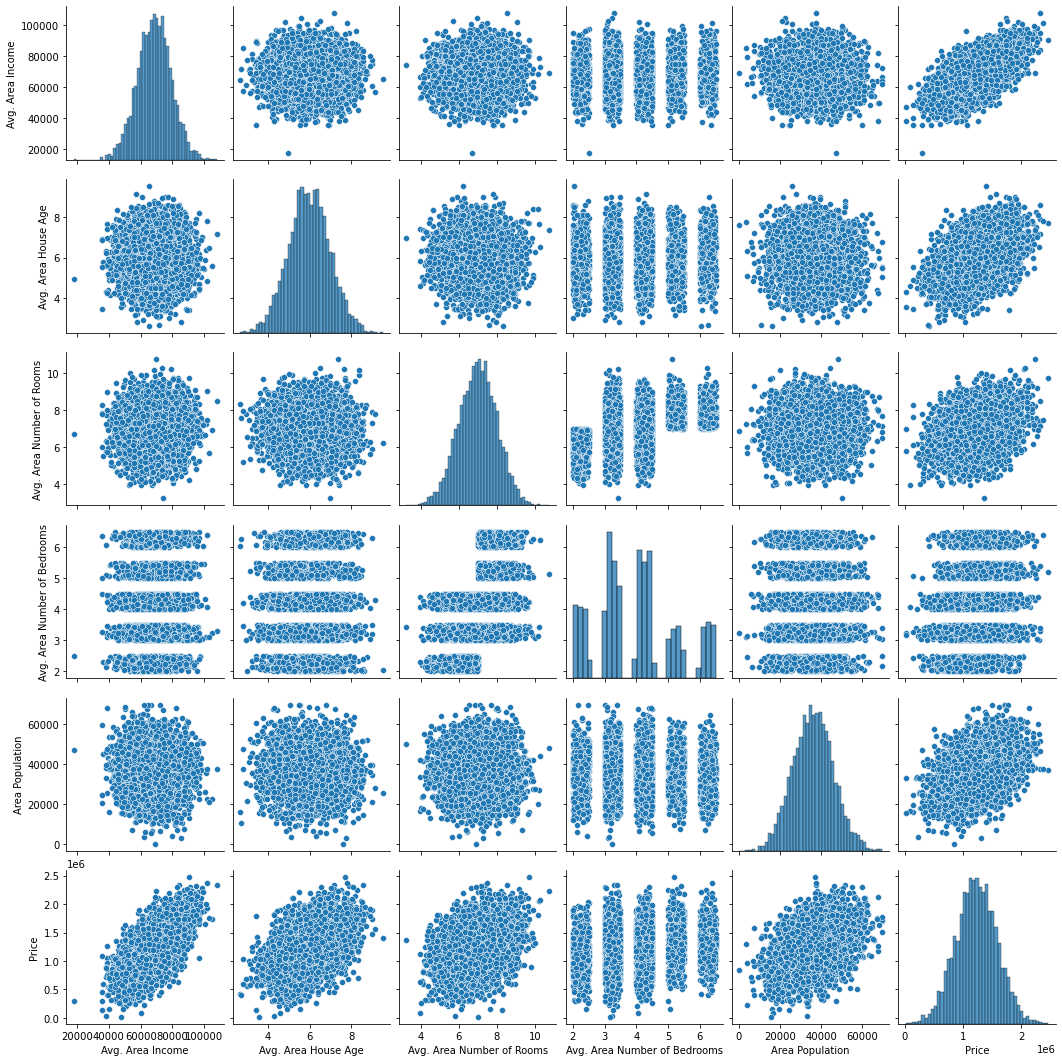

In [9]:
sns.pairplot(df);

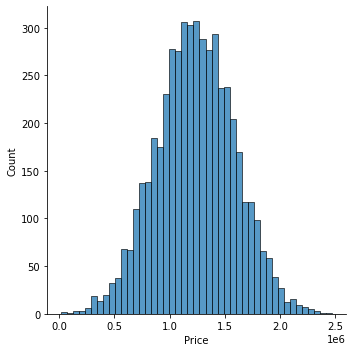

In [10]:
sns.displot(df['Price']);

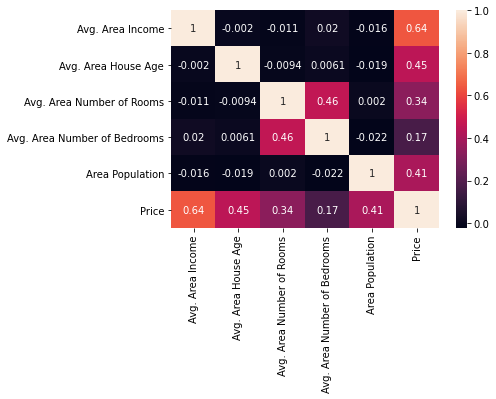

In [11]:
sns.heatmap(df.corr(), annot=True);

### Split Data into Train and Split 

In [12]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

- Drop Address columns as it is text datatype (not using NPL in this section)

In [13]:
# X data 
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [14]:
# y data 
y = df['Price']

In [15]:
# Import Skit Learn / cross_validation is model_selection updated
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
#Train the Linear Model 
lm = LinearRegression()

In [19]:
#Fit the Linear Model
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

-2640159.796851911


In [21]:
#get coefficients to learn a bit about the model 
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [22]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [23]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [24]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


### Get Prediction from Test Set

In [25]:
#Make predictions
predictions = lm.predict(X_test)

In [26]:
predictions

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

- Predicted prices of the houses 

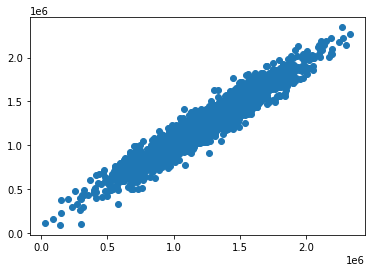

In [27]:
# Analyze residuals / Errors of the model based on the test sets
plt.scatter(y_test,predictions)

- This scatter plots represents a good prediction with an straight line upward movement. 

<AxesSubplot:xlabel='Price', ylabel='Count'>

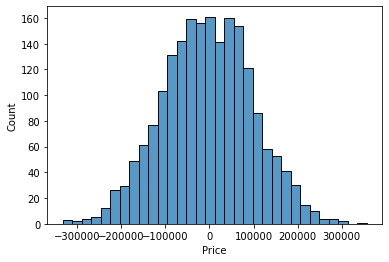

In [28]:
sns.histplot((y_test-predictions))

In [29]:
from sklearn import metrics

In [30]:
#Check metrics 
metrics.mean_absolute_error(y_test, predictions)

82288.22251914957

In [31]:
metrics.mean_squared_error(y_test, predictions)

10460958907.209501

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

102278.82922291153

----

# Part 2: Project Exercise: Should we focus more on our mobile app or web development?


Ecommerce Customers:
- Avg. Session Length: Average session of in-store style advice sessions.
- Time on App: Average time spent on App in minutes
- Time on Website: Average time spent on Website in minutes
- Length of Membership: How many years the customer has been a member.


In [33]:
# Import Libraries

import pandas as pd
import numpy as np
%matplotlib inline 

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---

In [36]:
#Load in the data
df = pd.read_csv('Ecommerce Customers.csv')

In [37]:
#Initial Inspection
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


- No misisng values
- Data types are ok 

In [39]:
df.shape

(500, 8)

In [40]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


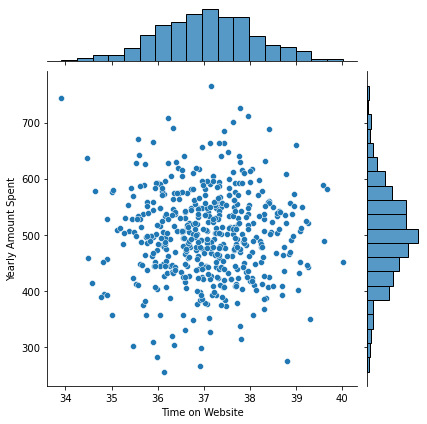

In [41]:
sns.jointplot(data=df, x='Time on Website',y='Yearly Amount Spent');

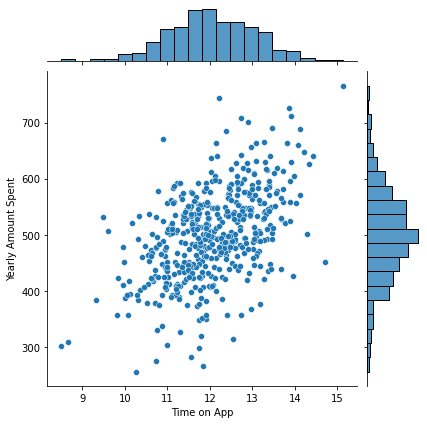

In [42]:
sns.jointplot(data=df, x='Time on App',y='Yearly Amount Spent');

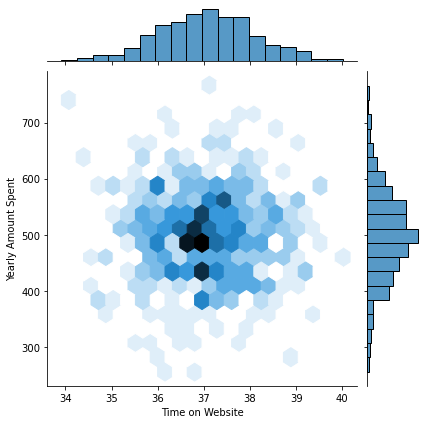

In [43]:
sns.jointplot(data=df, x='Time on Website',y='Yearly Amount Spent',kind='hex')

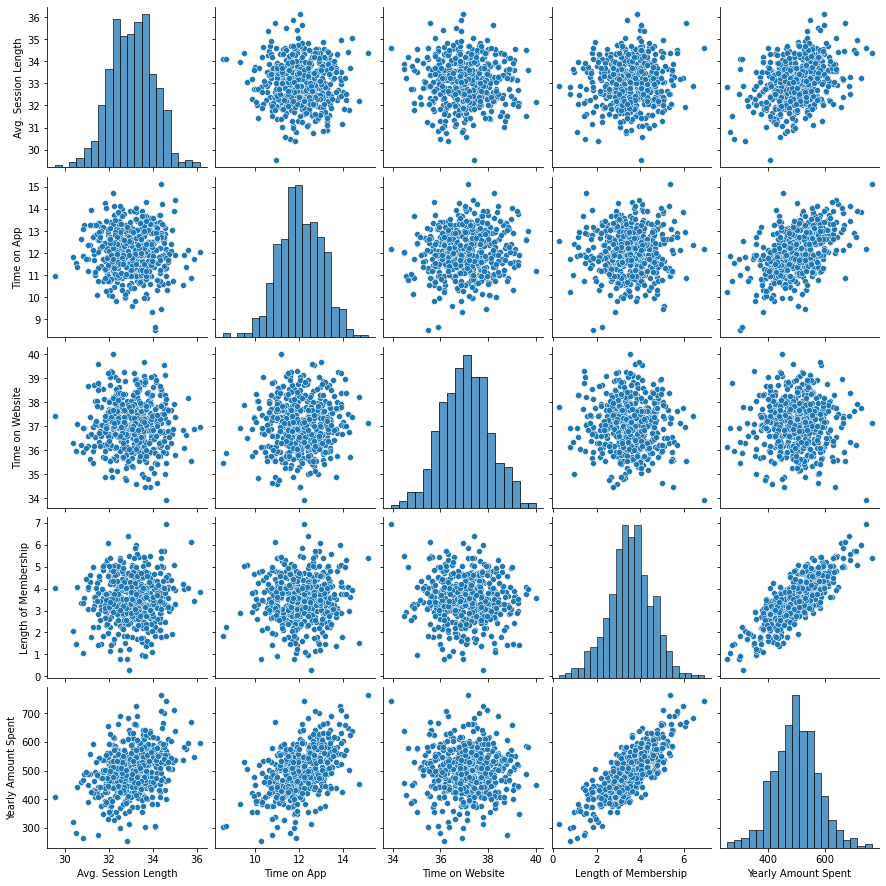

In [45]:
sns.pairplot(df)

Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?

- Length of membership has the most correlated feature with Yearly Amount Spent 

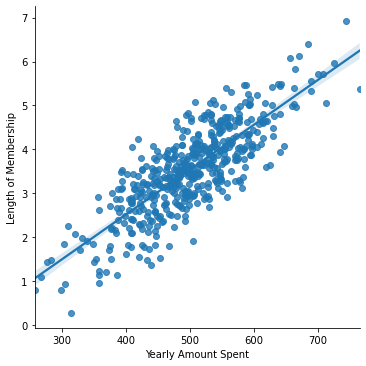

In [51]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data=df, palette = 'set1')

-----

# Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [52]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [53]:
# Set X to numerical features / y = Yearly Amount Spent 
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [55]:
# X data 
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [56]:
# y data 
y= df['Yearly Amount Spent']

In [57]:
# Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [58]:
# Train linear Model  
lm = LinearRegression()

In [59]:
# Fit model 
lm.fit(X_train,y_train)

LinearRegression()

In [60]:
print(lm.intercept_)

-1047.9327822502387


In [61]:
#get coefficients to learn a bit about the model 
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [62]:
dfc = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [63]:
dfc

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Predict Test Data 

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

In [64]:
predict = lm.predict(X_test)

In [65]:
predict

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

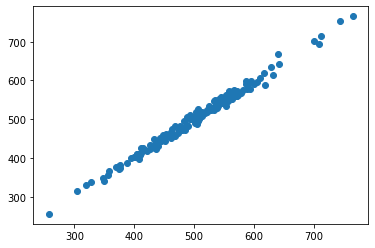

In [67]:
plt.scatter(y_test,predict)

Linear upward progression of data is a good sign 

----

# Evaluate the Model 

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [68]:
from sklearn import metrics 

In [69]:
#Check Metrics / absolute error
metrics.mean_absolute_error(y_test, predict)

7.228148653430853

In [70]:
# squared error 
metrics.mean_squared_error(y_test, predict)

79.81305165097487

In [72]:
# sqrt
np.sqrt(metrics.mean_squared_error(y_test, predict))

8.933815066978656

----

# Residuals 

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

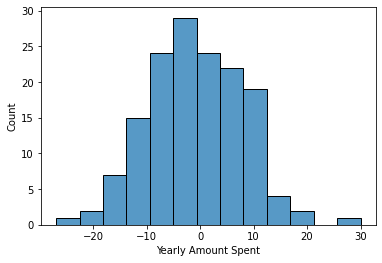

In [73]:
sns.histplot((y_test-predict))

# Conclusion from Data 

In [75]:
dfc

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


__Interpret coeff one by one to get a better understanding of the results__

We need to see the increases. The strongest increase for one unit  for Length of Membership has a 61 dollar return. Followed by Time on App increase of 39 dollars.  


Two possible options: It would depend on the business's direction, resources and future goals of the company. We would compare the different cost for app development and website development and use that further research to narrow down which option would be best for the company. 

First:
- Develop the app more as it yeilds a higher increase compared to the website. 

Second:
- Develop the website to catch up to the app to have two stronger sources on increases. 
